<h1><center>Bangalore House price prediction using Linear regression model</center>

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

### EDA and Data Pre-Processing  

In [51]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [52]:
df.shape

(13320, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [54]:
for i in df.columns:
    print(df[[i]].value_counts())
    print('*'*30)

area_type           
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
dtype: int64
******************************
availability 
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
16-Nov               1
16-Jul               1
16-Jan               1
14-Jul               1
Length: 81, dtype: int64
******************************
location           
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Length: 1305, dtype: int64
******************************
size      
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          

In [55]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [56]:
df.drop(columns=['area_type','availability'],inplace = True)
df.head()

,location,size,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [57]:
df.isnull().sum()

location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [58]:
# Replacing missing value in location:

print(df[df.location.isnull() == True])
print()
print(df[df.society == 'Grare S'])

# Since both of the properties are of same params location is updated as same.
df.location = df.location.replace(to_replace=np.nan,value='Grare S')
print('\nAfter replacing :')
print(df.isnull().sum())

    location   size  society total_sqft  bath  balcony  price
568      NaN  3 BHK  Grare S       1600   3.0      2.0   86.0

         location   size  society total_sqft  bath  balcony  price
568           NaN  3 BHK  Grare S       1600   3.0      2.0   86.0
12238  Anantapura  3 BHK  Grare S       1600   3.0      2.0   77.0

After replacing :
location         0
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64


In [59]:
# Handling values in Size column:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [60]:
df[df['size'].isnull() == True]

,location,size,society,total_sqft,bath,balcony,price
579,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [61]:
df = df[df['size'].isnull() == False]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13304 non-null  object 
 1   size        13304 non-null  object 
 2   society     7805 non-null   object 
 3   total_sqft  13304 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13304 non-null  float64
dtypes: float64(3), object(4)
memory usage: 831.5+ KB


In [63]:
# Handling Null in society
soc = []
for i in df.society.isna():
    if i:
        soc.append('Non Community')
    else:
        soc.append('Community')
df.society = soc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13304 non-null  object 
 1   size        13304 non-null  object 
 2   society     13304 non-null  object 
 3   total_sqft  13304 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13304 non-null  float64
dtypes: float64(3), object(4)
memory usage: 831.5+ KB


In [64]:
# changing size datatype:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)
df.head()

,location,size,society,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,Community,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,Community,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,Non Community,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,Community,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,Non Community,1200,2.0,1.0,51.00,2


In [65]:
df.drop(columns='size', inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13304 non-null  object 
 1   society     13304 non-null  object 
 2   total_sqft  13304 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13304 non-null  float64
 6   bhk         13304 non-null  int32  
dtypes: float64(3), int32(1), object(3)
memory usage: 779.5+ KB


In [67]:
#handling missing data in total sqft:
def convertToSqft(updated_total_sqft):
    new_upda = []
    for i in updated_total_sqft:
        if (i.find('-') > -1):
            low, high = i.split(' - ')
            low = float(low)
            high = float(high)
            new_upda.append(low + (high - low)/2)
        elif i.find('Sq. M') > -1:
            new_upda.append(10.7639104 * float(i.split('Sq. M')[0]))
        elif i.find('Sq. Y') > -1:
            new_upda.append(9 * float(i.split('Sq. Y')[0]))
        elif i.find('Per') > -1:
            new_upda.append(25.29 * 10.7639104 * float(i.split('Per')[0]))
        elif i.find('Acr') > -1:
            new_upda.append(43560 * float(i.split('Acr')[0]))
        elif i.find('Cents') > -1:
            new_upda.append(435.56 * float(i.split('Cen')[0]))
        elif i.find('Gun') > -1:
            new_upda.append(1089 * float(i.split('Gun')[0]))
        elif i.find('Groun') > -1:
            new_upda.append(2400.352 * float(i.split('Groun')[0])) 
        else:
            new_upda.append(float(i))
    return new_upda

In [68]:
for i in df['total_sqft'].unique():
    print(i)

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
1330.74
970
1459
800
869
1270
1670
2010
1185
1600
3010 - 3410
1500
1407
840
4395
845
5700
1160
3000
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
2957 - 3450
1326
1325
1499
1665
708
1060
710
1450
2894
1330
2502
650
2400
1007
966
1630
1640
782
1260
1413
1116
1530
3700
2497
1436
276
1427
2061
3067 - 8156
2650
1282
1050
945
950
1870
880
1535
1360
1042 - 1105
1280
5000
3050
1563.05
1167
4000
1828
890
1612
1034
1710
957
2795
1125
1735
2050
3750
1063
1904
4200
2000
1145 - 1340
1425
1470
1300
450
1152
1550
400
705
770
1242
1700
2144
1704
1846
1340
1015 - 1540
1327
1186
1783
1400
980
1285
912
1225
1909
1359
1207
1736
2850
1595
1798
1475
1580
1295
3600
589
1415
1787
984
1520 - 1740
2405
1080
1900
805
1153
1148
1110
1933
3500
645
1644
910
1577
4050
2420
900
1108
30

In [69]:
updated_total_sqft = convertToSqft(df['total_sqft'])
df['total_sqft'] = updated_total_sqft

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13304 non-null  object 
 1   society     13304 non-null  object 
 2   total_sqft  13304 non-null  float64
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13304 non-null  float64
 6   bhk         13304 non-null  int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 779.5+ KB


In [71]:
val = df['bhk']-1
mask = ~(df.balcony.isnull())
df.balcony = df.balcony.where(mask, other = val,axis=0)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13304 non-null  object 
 1   society     13304 non-null  object 
 2   total_sqft  13304 non-null  float64
 3   bath        13247 non-null  float64
 4   balcony     13304 non-null  float64
 5   price       13304 non-null  float64
 6   bhk         13304 non-null  int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 779.5+ KB


In [73]:
val = df['bhk']
mask = ~(df.bath.isnull())
df.bath = df.bath.where(mask, other = val,axis=0)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13304 non-null  object 
 1   society     13304 non-null  object 
 2   total_sqft  13304 non-null  float64
 3   bath        13304 non-null  float64
 4   balcony     13304 non-null  float64
 5   price       13304 non-null  float64
 6   bhk         13304 non-null  int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 779.5+ KB


upperlimit_total_sqft: 5400.0
lowerlimit_total_sqft: 500.0
before removing outliers: 13304
after removing outliers: 13050
outlier data: 254


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

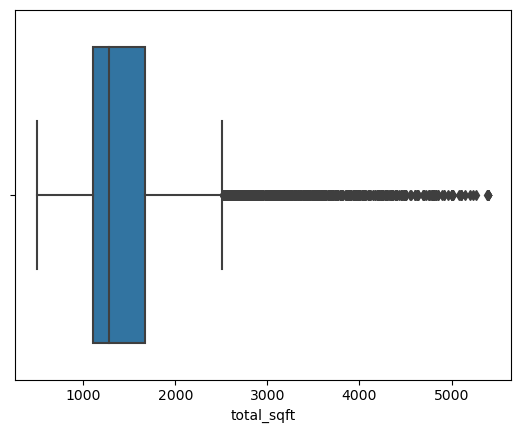

In [75]:
# trimming the outliers of price data
upperlimit_total_sqft = df['total_sqft'].quantile(0.99)
lowerlimit_total_sqft = df['total_sqft'].quantile(0.01)
print('upperlimit_total_sqft:', upperlimit_total_sqft)
print('lowerlimit_total_sqft:', lowerlimit_total_sqft)
# trimming the outliers of price data
df_total_sqft = df.loc[(df['total_sqft']<= upperlimit_total_sqft) & (df['total_sqft']>=lowerlimit_total_sqft)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(df_total_sqft))
print('outlier data:',len(df)-len(df_total_sqft))
sns.boxplot(df_total_sqft['total_sqft'])

In [76]:
df1 = df_total_sqft.copy()

In [77]:
mask = df1.location.value_counts()<=10
vals = df1.location.value_counts()[mask]
loc = []
for i in df1.location:
    if i in vals.index:
        loc.append('others')
    else:
        loc.append(i)
df1.location = loc


#### Correlation analysis:

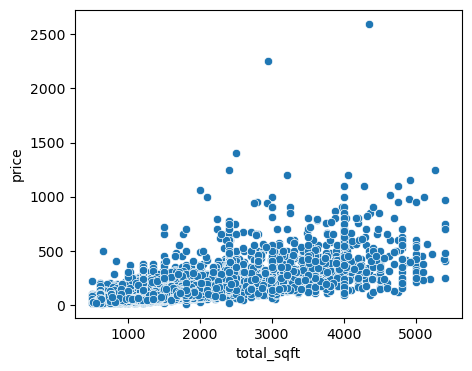

Correlation between total_sqft and price: 0.6989945698954434



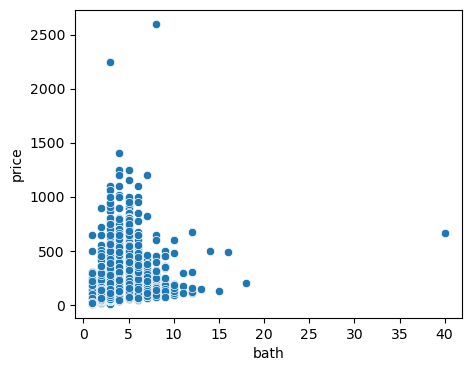

Correlation between bath and price: 0.5060659250493329



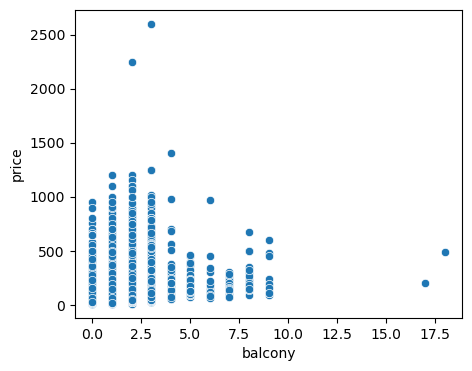

Correlation between balcony and price: 0.18982900678744555



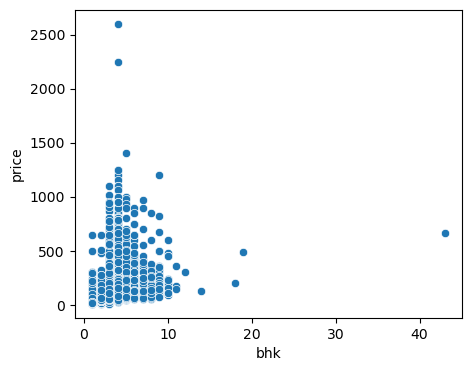

Correlation between bhk and price: 0.4537208721564514



In [78]:
for i in df1.select_dtypes(exclude='object'):
    if i != 'price':
        plt.figure(figsize=(5,4),dpi = 100)
        sns.scatterplot(x=df1[i],y=df1['price'])
        plt.show()
        print(f'Correlation between {str(i)} and price:',df1[i].corr(df1['price']))
        print()

####  Dummy encoding

In [79]:
df1_dummy = pd.get_dummies(df1,drop_first=True)

In [80]:
x = df1_dummy.drop(columns='price')
y = df1_dummy['price']

In [ ]:
# Dropping x due to high correlation with bath
x = x.drop(columns='bhk')

#### Test train split and testing for 2 Sample t test for independence

In [85]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [92]:
# T test on sampling
for i in range(xtrain.shape[1]):
    print(xtrain.columns[i],':',end=' ')
    print(stats.ttest_ind(xtrain.iloc[i],xtest.iloc[i])[1])
    print()

total_sqft : 0.7972217730277461

bath : 0.754676748671043

balcony : 0.9322693507391552

location_1st Block Jayanagar : 0.87985712826401

location_1st Phase JP Nagar : 0.7587931773719917

location_2nd Phase Judicial Layout : 0.6857003348719561

location_2nd Stage Nagarbhavi : 0.7450026869632288

location_5th Block Hbr Layout : 0.8800404027486706

location_5th Phase JP Nagar : 0.8149334902866421

location_6th Phase JP Nagar : 0.8719046382601557

location_7th Phase JP Nagar : 0.6758410254247019

location_8th Phase JP Nagar : 0.7186194997642934

location_9th Phase JP Nagar : 0.7882332083267523

location_AECS Layout : 0.7684972062352419

location_Abbigere : 0.9041204037683676

location_Akshaya Nagar : 0.8954672756462341

location_Ambalipura : 0.6922678747734863

location_Ambedkar Nagar : 0.6575327104340141

location_Amruthahalli : 0.6727623972625871

location_Anandapura : 0.9981203150459088

location_Ananth Nagar : 0.5787068344033662

location_Anekal : 0.9791907672938118

location_Anjanapu

Since the p-values for most pairs of samples are between 0.25-0.975 (common significance level), we fail to reject the null hypothesis.
Therefore, there is insufficient evidence to conclude that these samples come from different populations.

### Model Building :

In [113]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
lmodel=model.fit(xtrain,ytrain)
y_predicted=lmodel.predict(xtest)
# print(f"slope:{lmodel.coef_},intercept:{lmodel.intercept_}")
y_predicted

array([112.55281948,  43.45159307, 134.58044821, ..., 132.2422297 ,
        70.17114082,  39.53146257])

In [115]:
from sklearn.metrics import r2_score
r2_score(ytest,y_predicted)

0.6037782657710414

<p>The obtained R2 is 0.60</p>
<p>The above model is performed purely based on linear regression model. The model can be optimized further to increase the R2 score</p>